# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

## Data Understanding
1. Checking the shape of the dataframe
2. Generating an overview of the dataframe
3. Checking the data for null values
4. Check if the rows are duplicated in the dataframe

In [346]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head(n=20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [347]:
penguins_df.shape

(344, 5)

In [348]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


#### Validing that null entries in the row shouldn't be greater than _80%_

In [349]:
penguins_df[penguins_df.isnull().sum(axis=1)>=4]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN


In [350]:
penguins_df= penguins_df.drop(penguins_df[penguins_df.isnull().sum(axis=1)>=4].index)
penguins_df.shape

(342, 5)

In [351]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [352]:
#penguins_df.duplicated().sum()

In [353]:
#penguins_df.drop_duplicates(inplace=True)
#penguins_df.shape

#### We dropped the rows in which all of the columns had null values, as well as the duplicate rows.

## Data Cleaning

### Validating unique values in the column 'sex'

In [354]:
penguins_df.sex.value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

#### Replacing "." with Na.

In [355]:
penguins_df["sex"] = np.where(penguins_df["sex"]==".",np.nan,penguins_df["sex"])
penguins_df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

## Exploratory Data Analysis

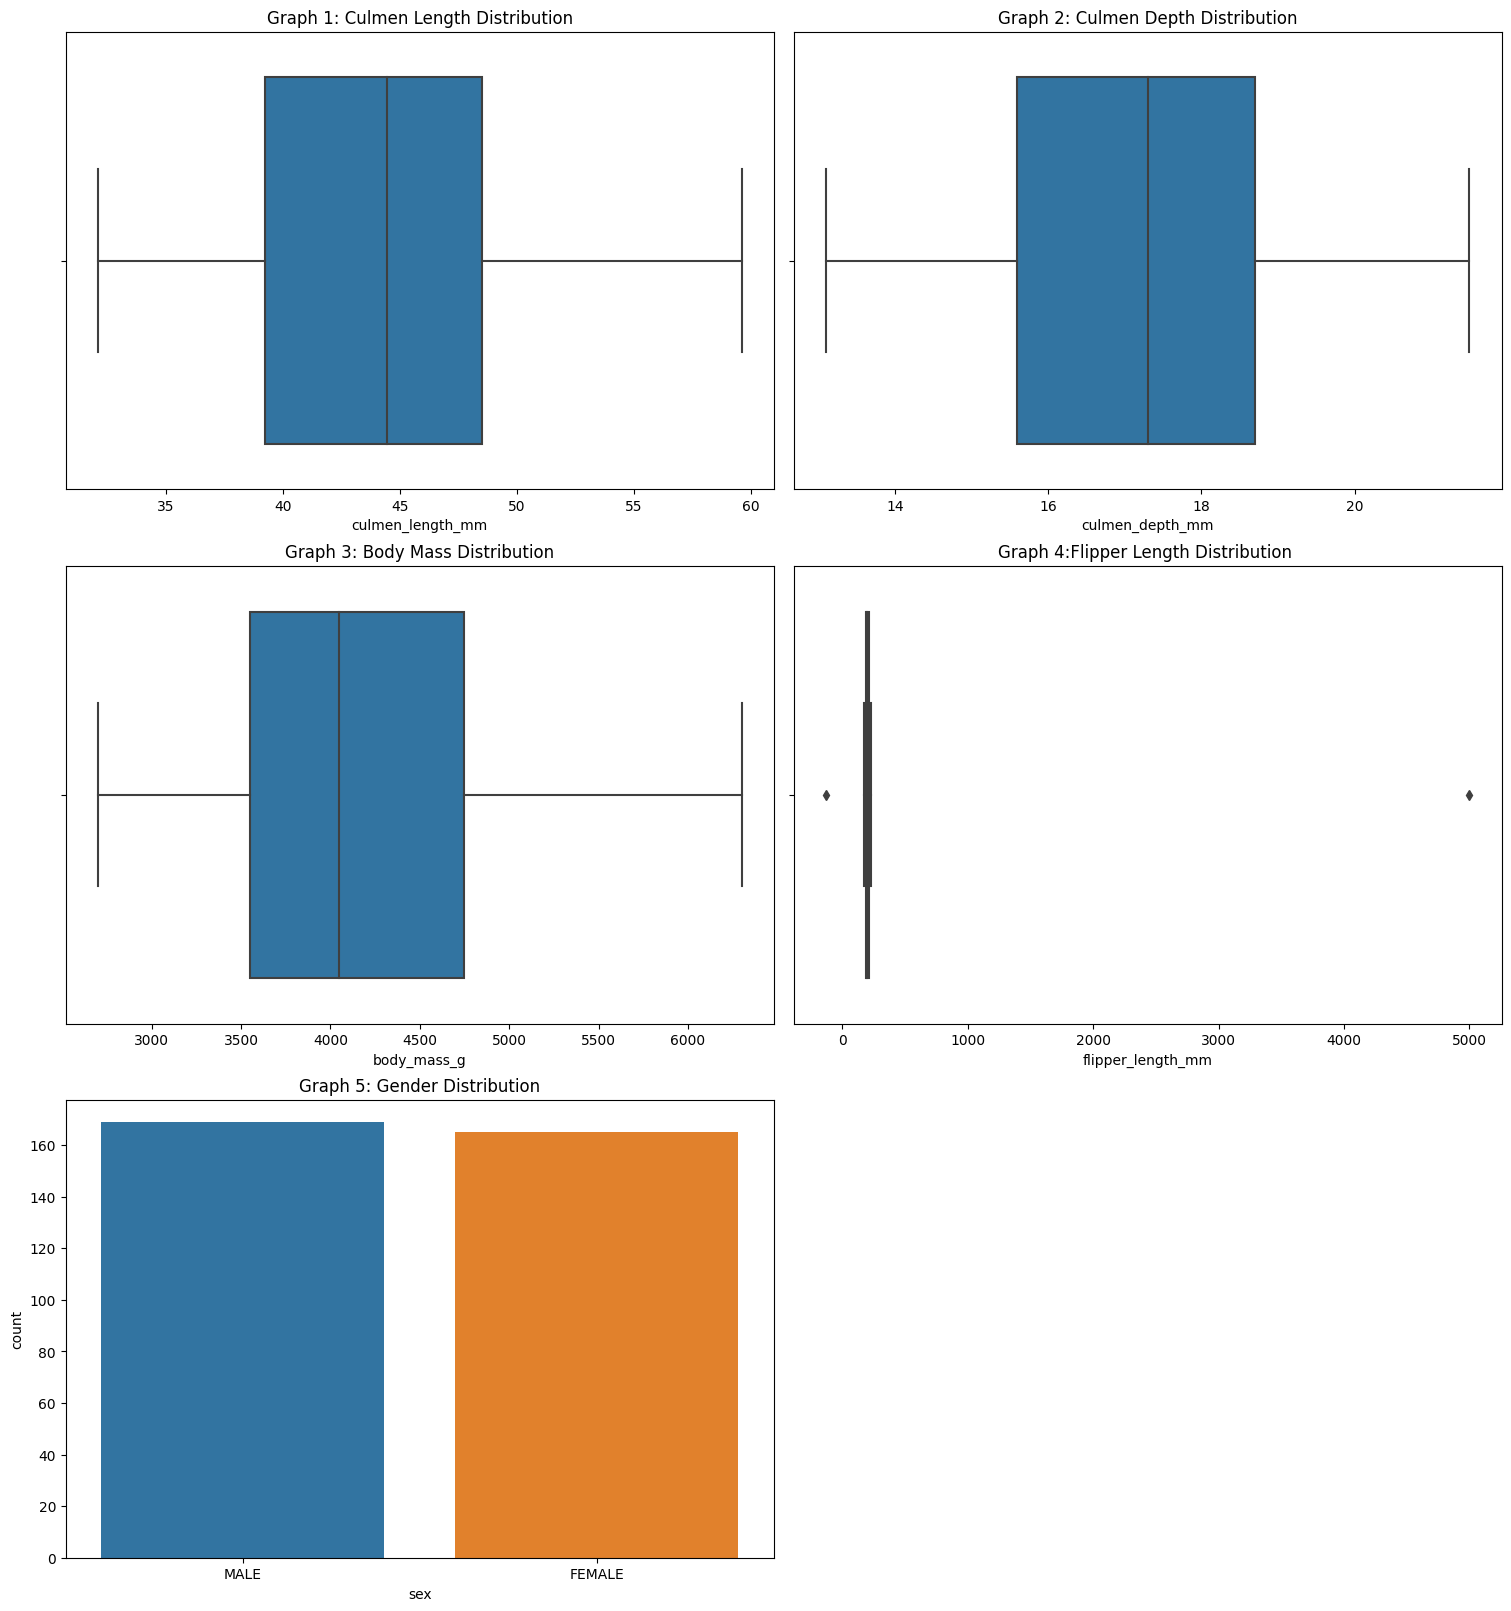

In [356]:
import seaborn as sns
fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(3, 2)
ax0 = fig.add_subplot(spec[0, 0])
sns.boxplot(x="culmen_length_mm",data = penguins_df,ax=ax0).set(title='Graph 1: Culmen Length Distribution')
ax1 = fig.add_subplot(spec[0, 1])
sns.boxplot(x="culmen_depth_mm",data = penguins_df,ax=ax1).set(title= "Graph 2: Culmen Depth Distribution")
ax2 = fig.add_subplot(spec[1, 0])
sns.boxplot(x="body_mass_g",data = penguins_df,ax=ax2).set(title = "Graph 3: Body Mass Distribution")
ax3 = fig.add_subplot(spec[1, 1])
sns.boxplot(x= "flipper_length_mm",data = penguins_df, ax= ax3 ).set(title = "Graph 4:Flipper Length Distribution ")
ax4 = fig.add_subplot(spec[2, 0])
sns.countplot(x="sex",data=penguins_df,ax= ax4).set(title="Graph 5: Gender Distribution")
plt.show()


### Insights:
1. There are outliers in flipper length.
2. In the dataframe, the male and female penguin numbers are about equal.

## Outlier And Missing Value Treatment
  1. Drop the missing values in the column "sex"
  2. Remove the outliers from the column "Flipper Length"

In [357]:
penguins_df = penguins_df.dropna()
penguins_df.shape

(334, 5)

In [358]:
low= penguins_df[penguins_df['flipper_length_mm']<0].index
high = penguins_df[penguins_df['flipper_length_mm']>4000].index
print(low[0])
print(high[0])
penguins_clean = penguins_df.drop([low[0],high[0]],axis=0)
penguins_clean.info()


14
9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


## Feature Preprocessing
1) Scale the data
2) Perform one hot encoding on the categorical variables

In [359]:
penguins_enc = pd.get_dummies(penguins_clean,columns = ['sex'])
penguins_enc = penguins_enc.drop(['sex_MALE'],axis = 1)
penguins_enc.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0


In [360]:
penguins_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    uint8  
dtypes: float64(4), uint8(1)
memory usage: 13.3 KB


In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_enc)
penguins_preprocessed = pd.DataFrame(penguins_scaled,columns = penguins_enc.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994


## Model Building

In [362]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components= n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA


array([[-1.56968445,  1.19590356],
       [-1.53725324, -0.7132486 ],
       [-1.58761602, -0.57856752],
       [-2.05554862, -0.23691914],
       [-1.58065301,  1.76897195],
       [-1.9772828 , -0.57332238],
       [-0.51335932,  1.45036734],
       [-2.0091688 , -0.59782384],
       [-1.59792868,  1.94751451],
       [-1.9601425 , -0.67222962],
       [-1.75464204, -0.28605697],
       [-0.45902298,  1.90209414],
       [-2.54675203, -0.55602766],
       [-0.62412396,  2.2885362 ],
       [-2.59149618, -0.40488406],
       [-1.83207283,  1.14947785],
       [-2.02636195, -0.25002503],
       [-1.24623907,  0.94865219],
       [-1.34759131,  0.69461718],
       [-2.10704771, -0.35578405],
       [-1.48275026,  1.1868289 ],
       [-1.90978331, -0.55210897],
       [-2.88624161, -0.30051165],
       [-1.38704209,  1.32576447],
       [-2.119407  , -0.91996638],
       [-1.64699729,  0.9624712 ],
       [-1.86874493, -0.61981671],
       [-1.22670503,  1.30817025],
       [-1.69825857,

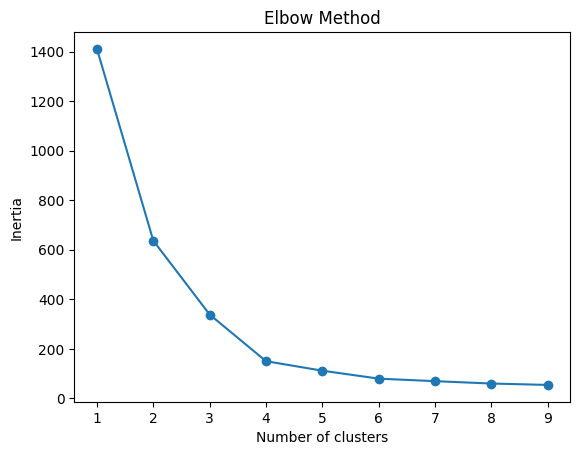

In [363]:
from sklearn.cluster import KMeans
# Detect the number of optimals for kmeans clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)  
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#### From the above elbow plot, we can see that number of clusters are 4. 

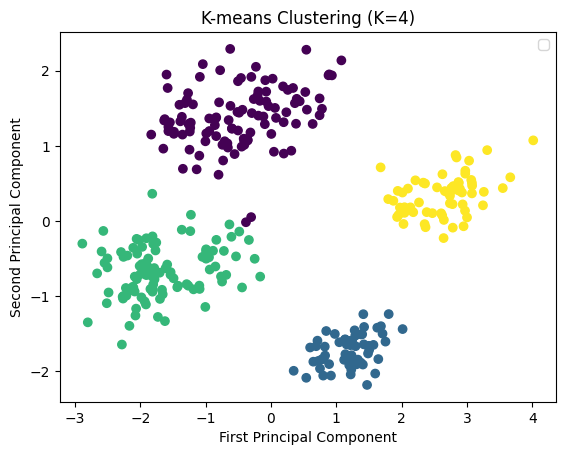

In [364]:
n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_cluster})')
plt.legend()
plt.show()

#### We can see 4 clusters are being formed.

In [365]:
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,0


In [366]:
stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,44.067593,19.095370,194.666667,4001.620370
1,45.563793,14.237931,212.706897,4679.741379
2,39.953333,17.599048,189.038095,3413.095238
3,49.473770,15.718033,221.540984,5484.836066
